# 🌞**Évaluation et Prévision des Énergies Renouvelables Variables (ERV)**

## 🎯 **Objectifs du Projet**

1. **Évaluer la production horaire des installations photovoltaïques** dans les régions de la France métropolitaine en utilisant des données climatiques et des observations des facteurs de capacité.

2. **Prédire la production énergétique des ERV à l'avance**, afin de mieux anticiper les variations de puissance et optimiser la gestion du réseau électrique.




---

Récupérer les données de production solaire 

In [9]:
#!pip install requests
#!pip install xarray netcdf4
#!pip install matplotlib

In [7]:
import requests
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# Liste des URLs pour chaque région
urls = {
    "Auvergne-Rhône-Alpes": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Auvergne-Rh%C3%B4ne-Alpes%22",
    "Bourgogne-Franche-Comté": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Bourgogne-Franche-Comt%C3%A9%22",
    "Bretagne": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Bretagne%22",
    "Centre-Val de Loire": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Centre-Val%20de%20Loire%22",
    "Grand Est": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Grand%20Est%22",
    "Hauts-de-France": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Hauts-de-France%22",
    "Île-de-France": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22%C3%8Ele-de-France%22",
    "Normandie": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Normandie%22",
    "Nouvelle-Aquitaine": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Nouvelle-Aquitaine%22",
    "Occitanie": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Occitanie%22",
    "Pays de la Loire": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Pays%20de%20la%20Loire%22",
    "Provence-Alpes-Côte d'Azur": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Provence-Alpes-C%C3%B4te%20d'Azur%22"
}

# Base URL pour l'API
base_url = "https://odre.opendatasoft.com"

# Configurer le retry pour gérer les échecs temporaires
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
session.mount('https://', HTTPAdapter(max_retries=retries))

# Liste pour collecter les données de toutes les régions
all_data = []

# Plage de dates filtrées
date_range_start = "2014-01"
date_range_end = "2019-12"

for region, endpoint in urls.items():
    try:
        # Effectuer une requête GET pour chaque région
        response = session.get(base_url + endpoint, timeout=30)
        response.raise_for_status()  # Vérifier si la requête a réussi

        # Charger les données JSON
        data = response.json()
        results = data.get("results", [])

        # Extraire les champs pertinents en filtrant par date
        formatted_data = [
            {
                "mois": record.get("mois"),
                "region": region,
                "production_solaire": record.get("production_solaire")
            }
            for record in results
            if date_range_start <= record.get("mois", "") <= date_range_end
        ]

        # Ajouter les données de cette région à la liste globale
        all_data.extend(formatted_data)

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la récupération des données pour {region} : {e}")

# Créer un DataFrame pandas avec toutes les données
df = pd.DataFrame(all_data)

# Réorganiser le format du tableau pour avoir les régions comme colonnes
df_pivot = df.pivot(index="mois", columns="region", values="production_solaire").reset_index()
df_pivot.columns.name = None  # Supprimer le nom des colonnes multi-index

# Exporter les données au format CSV
output_path = "production_solaire_2014_2019.csv"
df_pivot.to_csv(output_path, index=False)

output_path  # Chemin du fichier exporté


'production_solaire_2014_2019.csv'

In [8]:
import requests
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# URL de l'API
url = "https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/parc-regional-annuel-prod-eolien-solaire/records?select=annee%2Cregion%2Cparc_installe_solaire&where=annee%3E2013%20AND%20annee%3C2021&limit=100"

# Configurer le retry pour gérer les échecs temporaires
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
session.mount('https://', HTTPAdapter(max_retries=retries))

try:
    # Effectuer une requête GET
    response = session.get(url, timeout=30)
    response.raise_for_status()  # Vérifie si la requête a réussi

    # Charger les données JSON
    data = response.json()
    results = data.get("results", [])

    # Extraire les champs pertinents
    formatted_data = [
        {
            "annee": record.get("annee"),
            "region": record.get("region"),
            "parc_installe_solaire": record.get("parc_installe_solaire")
        }
        for record in results
    ]

    # Créer un DataFrame pandas
    df = pd.DataFrame(formatted_data)

    # Réorganiser le tableau pour qu'il soit structuré par année et région
    df_pivot = df.pivot(index="annee", columns="region", values="parc_installe_solaire").reset_index()
    df_pivot.columns.name = None  # Supprimer le nom des colonnes multi-index

    # Exporter les données au format CSV
    output_path = "parc_installe_solaire_2014_2019.csv"
    df_pivot.to_csv(output_path, index=False)

    print(f"Données exportées avec succès : {output_path}")

except requests.exceptions.RequestException as e:
    print(f"Erreur lors de la requête API : {e}")
except Exception as e:
    print(f"Erreur générale : {e}")


Données exportées avec succès : parc_installe_solaire_2014_2019.csv


In [9]:
import pandas as pd

# Charger les deux fichiers existants
production_solaire_df = pd.read_csv("production_solaire_2014_2019.csv")
parc_installe_solaire_df = pd.read_csv("parc_installe_solaire_2014_2019.csv")

# Assurez-vous que les deux fichiers sont alignés sur les mêmes colonnes et années
production_solaire_df['annee'] = pd.to_datetime(production_solaire_df['mois']).dt.year
parc_installe_solaire_df = parc_installe_solaire_df.set_index("annee")

# Diviser les valeurs de production solaire par le parc installé correspondant
for region in production_solaire_df.columns[1:-1]:  # Ignorer 'mois' et 'annee'
    if region in parc_installe_solaire_df.columns:
        production_solaire_df[region] = production_solaire_df.apply(
            lambda row: row[region] / parc_installe_solaire_df.loc[row['annee'], region]
            if not pd.isna(row[region]) and not pd.isna(parc_installe_solaire_df.loc[row['annee'], region]) else None,
            axis=1
        )

# Multiplier toutes les valeurs par 1000 (conversion de GWh à MWh)
# Diviser ensuite par 24 * 30.5 (heures dans un mois)
conversion_factor = 1000 / (24 * 30.5)
production_solaire_df.iloc[:, 1:] = production_solaire_df.iloc[:, 1:] * conversion_factor

# Supprimer la colonne 'annee' (elle était temporaire)
production_solaire_df = production_solaire_df.drop(columns=['annee'])

# Exporter le nouveau fichier CSV
output_path = "normalized_production_solaire_2014_2019.csv"
production_solaire_df.to_csv(output_path, index=False)

print(f"Données normalisées et converties exportées avec succès : {output_path}")


Données normalisées et converties exportées avec succès : normalized_production_solaire_2014_2019.csv


/tmp/ipykernel_1061/1280283660.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     2751.366120
1     2751.366120
2     2751.366120
3     2751.366120
4     2751.366120
         ...     
67    2758.196721
68    2758.196721
69    2758.196721
70    2758.196721
71    2758.196721
Name: annee, Length: 72, dtype: float64' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  production_solaire_df.iloc[:, 1:] = production_solaire_df.iloc[:, 1:] * conversion_factor


<Axes: xlabel='mois'>

<Figure size 640x480 with 0 Axes>

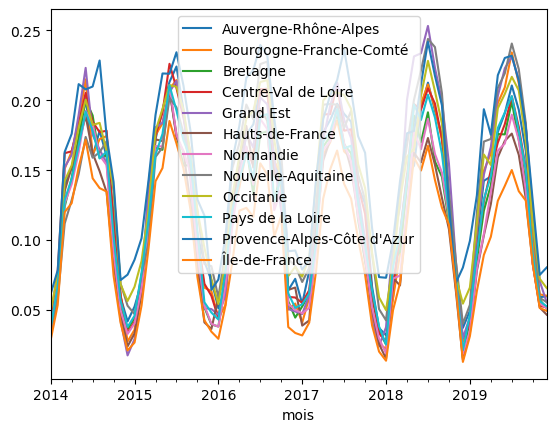

In [10]:
import matplotlib.pyplot as plt

filepath2='normalized_production_solaire_2014_2019.csv'
df_energy2 = pd.read_csv(filepath2, index_col=0, header=0, parse_dates=True)
plt.figure()
df_energy2.plot()

Récupérer les données climatiques 

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

data_dir_climate = "data"
filename_climate = 'merra2_area_selection_output_{}_merra2_2010-2019.nc'



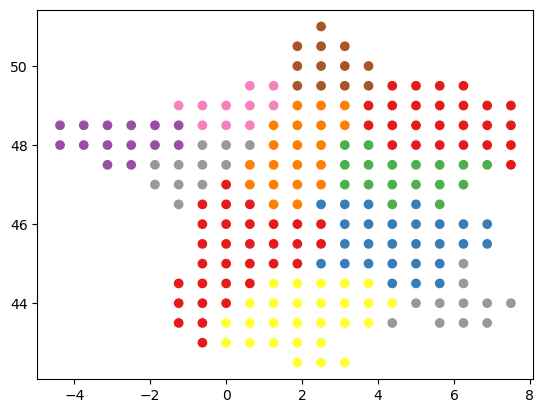

In [17]:

filename_mask = "mask_datagouv_french_regions_merra2_Nx_France.nc"

filepath_mask = Path(data_dir_climate, filename_mask)
 # Read and plot grid point-region mask

ds_mask = xr.load_dataset(filepath_mask, engine='netcdf4')
da_mask = ds_mask['mask']
plt.figure()
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_mask, cmap='Set1')

Visualisation des données de production